# Checking for Scaling of Critical Polymer Concentration vs. Temperature

Reviewer #2 also was interested in the effect of temperature on the critical polymer concentration. Here, we plot the critical line on a log-log plot to check for the possibility of such a scaling empirically before searching for an analytical form.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import glob
import pandas as pd

# plotting
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt

import salt
import pe
import plot

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from bokeh.io import output_notebook
from bokeh.plotting import show

from importlib import reload
reload(salt)
reload(pe)

output_notebook()


# USER PARAMETERS
save_folder = '../PAPERS/ccls/figs/n_100/'
Z = 1 # charge per monomer (same for polyanion and polycation)
# range of temperatures considered (liquid water) [K]
T_range = [273.15, 373.15]
# list of salt [KBr] concentrations [mol/L]
rho_s_list = [1.57, 1.78, 1.82]
# list of polyanion [PSS] concentrations [mol/L]
rho_p_list = [0.135]
# accurate choice for sigma based on Bjerrum length of water (see fit_sigma_to_prabhu_data_asymN.ipynb)
sigma = 4.1E-10 # [m]
# conversion of meters to Angstroms [A]
m_2_A = 1E10
# conversion from beads/sigma^3 to mol/L (M)
beads_2_M = pe.get_beads_2_M(sigma, SI=True)
# conversion from volume fraction to mol/L (M)
phi_2_M = 6/np.pi**beads_2_M

# list of colors for isotherms of binodal at different Bjerrum lengths
lB_color_list = ['#3B99FE', '#FFBF2E', '#E04D43'] # blue, yellow, red


# declares naming structure of files
naming_structure = 'NA(100)NB(100)lB(*)f(1.000)'
mu_naming_structure = 'NA(100)NB(100)lB(*)f(1.000)'
ext = 'output.dat'

Loading BokehJS ...

### Derived Parameters and Helpful Functions

In [2]:
# helpful function
def round_up_to_nth(m, nth):
    """Rounds m to nearest nth (fraction)"""
    return int(m*nth+1)/nth

def plot_scaling(data_cp, xlog=True, ylog=True, xlabel=r'$l_B$'):
    # creates figure
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # extracts data
    rho_pc = data_cp[0,:] # critical polymer concentrations [mol/L]
    x_c = data_cp[2,:] # critical z (Bjerrum length or temperature)

    # plots data
    ax.plot(x_c, rho_pc, lw=2)

    # formats plot
    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')
        
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(r'$\rho_p^c$ [mol/L]', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    
    return ax

In [3]:
# max and min Bjerrum length
T_min = 273 # [K] freezing point of h2o
T_max = 373 # [K] boiling point of h2o
lB_min = pe.lB_fn(T_min, sigma=sigma)
lB_max = round_up_to_nth(pe.lB_fn(T_max, sigma=sigma), 500) # ensures lB_max > lB_hi

print('Minimum Bjerrum length = {0:.3f} and maximum = {1:.3f}'.format(lB_min, lB_max))

# list of Bjerrum lengths to plot--correspond to [0 C, 50 C, 100 C], rounded to nearest 0.002 (spacing of data)
# computes BJerrum lengths
lB_lo = round_up_to_nth(lB_min, 500)
lB_mid = round_up_to_nth(pe.lB_fn(323, sigma=sigma), 500)
lB_hi = lB_max # don't round up or else lB_hi > lB_max and will lack data
# collects in list
lB_list = [lB_lo, lB_mid, lB_hi] # [0, 50, 100] degrees C

Minimum Bjerrum length = 1.702 and maximum = 2.286


## Liquid State Theory

In [4]:
reload(salt)
### DATA PARAMETERS ###
# folder with binodal data
data_folder = '../salt/n_100_chris/' # must contain mu in .PD file
# concentration of salt in reservoir [mol/L]
rho_salt_M = 1.85
# converts to beads/sigma^3
rho_salt = rho_salt_M/beads_2_M
# folder with chemical potential calculations for salt solution
mu_salt_folder = '../salt/mu_salt_100_chris/'
### FORMATTING PARAMETERS ###
# number of points to have in plot
n_pts = 100000
# parameter to plot for z axis
z_name = 'BJ'
# binodal at fixed temperature
z_rough = 1.9
# fixed composition [M]
rho_s = 1.6
rho_p = 1.6
# index for critical point
i_cp = -2 # last line has some junk?
# suppresses output of data processing
quiet = True

In [5]:
# loads data
data = salt.load_data(data_folder, ext=ext,
                lB_lo=lB_lo, lB_hi=lB_hi, naming_structure=naming_structure)

In [6]:
# computes data
_, _, _, data_cp_ls, _ = salt.data_fig1(data, mu_salt_folder, rho_salt, T_range, 
                                        sigma, z_name, beads_2_M, n_pts, z_rough, 
                                       lB_lo=lB_lo, lB_hi=lB_hi, rho_s=rho_s, rho_p=rho_p,
                                         ext=ext, naming_structure=naming_structure,
                                       mu_naming_structure=mu_naming_structure, i_cp=i_cp, 
                                       quiet=quiet)

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\ccls_analysis\salt.py:109: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\ccls_analysis\salt.py:111: RuntimeWarning:

invalid value encountered in add



## Plot Critical Line

Having computed the critical line and stored its values in `data_cp`, I will now plot it as a function of temperature on the salt--temperature axis.

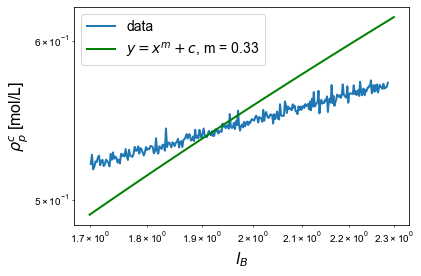

In [14]:
ax = plot_scaling(data_cp_ls)

# plots scaling
m = 0.33
x = np.linspace(1.7, 2.3, 100)
y = x**m - 0.7
ax.plot(x, y, 'g', lw=2)

ax.legend(labels=['data', r'$y=x^m+c$, ' + 'm = {0:.2f}'.format(m)], fontsize=14)

Not inconsistent with a power-law scaling, but not convincing either (noisy and shown over only a fraction of a decade).